# Freight Values Predict

## Data Import

In [47]:
import pandas as pd

df = pd.read_csv('./Data/df_delivered_processing.csv')

In [4]:
cols = ["customer_city", "customer_state", "seller_state", "product_category_name", 
        "price", "freight_value", "product_weight_g", "product_volume_g", 
        "seller_customer_distance_km", "order_purchase_month", "order_purchase_weekday"]

df_freight = df[cols].copy()
df_freight.shape

(93631, 11)

In [5]:
df_freight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93631 entries, 0 to 93630
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_city                93631 non-null  object 
 1   customer_state               93631 non-null  object 
 2   seller_state                 93631 non-null  object 
 3   product_category_name        93631 non-null  object 
 4   price                        93631 non-null  float64
 5   freight_value                93631 non-null  float64
 6   product_weight_g             93631 non-null  float64
 7   product_volume_g             93631 non-null  float64
 8   seller_customer_distance_km  93631 non-null  float64
 9   order_purchase_month         93631 non-null  int64  
 10  order_purchase_weekday       93631 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 7.9+ MB


## Freight Values

### Modeling, RandomForest

In [6]:
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
ctg_col_list = ["customer_city", "customer_state", "seller_state", "product_category_name"]

def onehot_encoding(df, ctg_col_list):
    df_ml = df.copy()
    df_oh = pd.get_dummies(df_ml, columns=ctg_col_list)
    
    return df_oh

df_freight_oh = onehot_encoding(df_freight, ctg_col_list)

In [10]:
def def_modeling(df_x, df_y, model_name):
    
    X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    start_time = datetime.now()
    print("Start Time : ", start_time)
    model_name.fit(X_train, y_train)
    print("Modeling Complete!")
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MAE : {mae}, MSE : {mse}")
    print("-"*30)
    end_time = datetime.now()
    print("End Time : ", end_time)
    print("Loading Time : ", end_time - start_time)

    return model_name

In [11]:
df_x = df_freight_oh.drop(columns="freight_value")
df_y = df_freight_oh["freight_value"]

model = RandomForestRegressor()

model_rf_freight = def_modeling(df_x, df_y, model)

(74904, 4040) (18727, 4040) (74904,) (18727,)
Start Time :  2024-01-30 01:58:51.453038
Modeling Complete!
MAE : 3.3114009830005227, MSE : 57.99384335249294
------------------------------
End Time :  2024-01-30 02:08:08.622097
Loading Time :  0:09:17.169059


* 약 3.31R$ (헤알)의 오차, 한화 약 880 ~ 890원의 오차 발생

### Predict
* change seller_customer_distance_km, seller_state

In [12]:
df_freight_oh_copy = df_freight_oh.copy()

In [13]:
# seller_state_AP, seller_state_AP, seller_state_TO 컬럼이 True인 경우, 해당 컬럼들을 False로 변경
df_freight_oh_copy.loc[(df_freight_oh_copy['customer_state_MA'] == True) | (df_freight_oh_copy['customer_state_PA'] == True) | (df_freight_oh_copy['customer_state_AP'] == True) | (df_freight_oh_copy['customer_state_TO'] == True), df_freight_oh_copy.columns.str.startswith('seller_state_')] = False
# seller_state_AP, seller_state_AP, seller_state_TO 컬럼이 True인 경우, seller_state_MA 컬럼을 True로 변경
df_freight_oh_copy.loc[(df_freight_oh_copy['customer_state_MA'] == True) | (df_freight_oh_copy['customer_state_PA'] == True) | (df_freight_oh_copy['customer_state_AP'] == True) | (df_freight_oh_copy['customer_state_TO'] == True), 'seller_state_MA'] = True

df_freight_oh_copy.loc[(df_freight_oh_copy['customer_state_MT'] == True) | (df_freight_oh_copy['customer_state_GO'] == True) | (df_freight_oh_copy['customer_state_DF'] == True) | (df_freight_oh_copy['customer_state_MS'] == True), df_freight_oh_copy.columns.str.startswith('seller_state_')] = False
df_freight_oh_copy.loc[(df_freight_oh_copy['customer_state_MT'] == True) | (df_freight_oh_copy['customer_state_GO'] == True) | (df_freight_oh_copy['customer_state_DF'] == True) | (df_freight_oh_copy['customer_state_MS'] == True), 'seller_state_MT'] = True

df_freight_oh_copy.loc[(df_freight_oh_copy['customer_state_PR'] == True) | (df_freight_oh_copy['customer_state_RS'] == True) | (df_freight_oh_copy['customer_state_SC'] == True), df_freight_oh_copy.columns.str.startswith('seller_state_')] = False
df_freight_oh_copy.loc[(df_freight_oh_copy['customer_state_PR'] == True) | (df_freight_oh_copy['customer_state_RS'] == True) | (df_freight_oh_copy['customer_state_SC'] == True), 'seller_state_PR'] = True

df_freight_oh_copy.loc[(df_freight_oh_copy['customer_state_CE'] == True) | (df_freight_oh_copy['customer_state_PB'] == True) | (df_freight_oh_copy['customer_state_RN'] == True) | (df_freight_oh_copy['customer_state_PI'] == True) | (df_freight_oh_copy['customer_state_PE'] == True), df_freight_oh_copy.columns.str.startswith('seller_state_')] = False
df_freight_oh_copy.loc[(df_freight_oh_copy['customer_state_CE'] == True) | (df_freight_oh_copy['customer_state_PB'] == True) | (df_freight_oh_copy['customer_state_RN'] == True) | (df_freight_oh_copy['customer_state_PI'] == True) | (df_freight_oh_copy['customer_state_PE'] == True), 'seller_state_CE'] = True

df_freight_oh_copy.loc[(df_freight_oh_copy['customer_state_RO'] == True) | (df_freight_oh_copy['customer_state_AC'] == True) | (df_freight_oh_copy['customer_state_AM'] == True) | (df_freight_oh_copy['customer_state_RR'] == True), df_freight_oh_copy.columns.str.startswith('seller_state_')] = False
df_freight_oh_copy.loc[(df_freight_oh_copy['customer_state_RO'] == True) | (df_freight_oh_copy['customer_state_AC'] == True) | (df_freight_oh_copy['customer_state_AM'] == True) | (df_freight_oh_copy['customer_state_RR'] == True), 'seller_state_RO'] = True

df_freight_oh_copy.loc[(df_freight_oh_copy['customer_state_SP'] == True) | (df_freight_oh_copy['customer_state_MG'] == True) | (df_freight_oh_copy['customer_state_RJ'] == True) | (df_freight_oh_copy['customer_state_ES'] == True), df_freight_oh_copy.columns.str.startswith('seller_state_')] = False
df_freight_oh_copy.loc[(df_freight_oh_copy['customer_state_SP'] == True) | (df_freight_oh_copy['customer_state_MG'] == True) | (df_freight_oh_copy['customer_state_RJ'] == True) | (df_freight_oh_copy['customer_state_ES'] == True), 'seller_state_SP'] = True

df_freight_oh_copy.loc[(df_freight_oh_copy['customer_state_SE'] == True) | (df_freight_oh_copy['customer_state_BA'] == True) | (df_freight_oh_copy['customer_state_AL'] == True), df_freight_oh_copy.columns.str.startswith('seller_state_')] = False
df_freight_oh_copy.loc[(df_freight_oh_copy['customer_state_SE'] == True) | (df_freight_oh_copy['customer_state_BA'] == True) | (df_freight_oh_copy['customer_state_AL'] == True), 'seller_state_SE'] = True

In [17]:
df_freight_oh_copy.loc[df_freight_oh_copy["seller_state_SE"] == True, "seller_lat"] = -10.853124
df_freight_oh_copy.loc[df_freight_oh_copy["seller_state_SE"] == True, "seller_lng"] = -37.061212

df_freight_oh_copy.loc[df_freight_oh_copy["seller_state_SP"] == True, "seller_lat"] = -22.868119
df_freight_oh_copy.loc[df_freight_oh_copy["seller_state_SP"] == True, "seller_lng"] = -47.090303

df_freight_oh_copy.loc[df_freight_oh_copy["seller_state_RO"] == True, "seller_lat"] = -8.531772
df_freight_oh_copy.loc[df_freight_oh_copy["seller_state_RO"] == True, "seller_lng"] = -63.823037

df_freight_oh_copy.loc[df_freight_oh_copy["seller_state_CE"] == True, "seller_lat"] = -3.553353
df_freight_oh_copy.loc[df_freight_oh_copy["seller_state_CE"] == True, "seller_lng"] = -40.417205

df_freight_oh_copy.loc[df_freight_oh_copy["seller_state_PR"] == True, "seller_lat"] = -25.186201
df_freight_oh_copy.loc[df_freight_oh_copy["seller_state_PR"] == True, "seller_lng"] = -54.674455

df_freight_oh_copy.loc[df_freight_oh_copy["seller_state_MT"] == True, "seller_lat"] = -16.255812
df_freight_oh_copy.loc[df_freight_oh_copy["seller_state_MT"] == True, "seller_lng"] = -54.674455

df_freight_oh_copy.loc[df_freight_oh_copy["seller_state_MA"] == True, "seller_lat"] = -5.323279
df_freight_oh_copy.loc[df_freight_oh_copy["seller_state_MA"] == True, "seller_lng"] = -47.492113

In [18]:
df_freight_oh_copy["customer_lat"] = df["customer_lat"]
df_freight_oh_copy["customer_lng"] = df["customer_lng"]

In [19]:
df_freight_oh_copy

,price,freight_value,product_weight_g,product_volume_g,seller_customer_distance_km,order_purchase_month,order_purchase_weekday,customer_city_abadia dos dourados,customer_city_abadiania,customer_city_abaete,...,product_category_name_sports_leisure,product_category_name_stationery,product_category_name_tablets_printing_image,product_category_name_telephony,product_category_name_toys,product_category_name_watches_gifts,customer_lat,customer_lng,seller_lat,seller_lng
0,29.99,8.72,500.0,329.3,17.867985,10,0,False,False,False,...,False,False,False,False,False,False,-23.583452,-46.586284,-22.868119,-47.090303
1,29.99,7.78,500.0,329.3,15.552495,8,1,False,False,False,...,False,False,False,False,False,False,-23.564977,-46.536043,-22.868119,-47.090303
2,29.99,7.78,500.0,329.3,24.575269,8,2,False,False,False,...,False,False,False,False,False,False,-23.532175,-46.626106,-22.868119,-47.090303
3,29.99,14.10,500.0,329.3,477.982052,10,0,False,False,False,...,False,False,False,False,False,False,-27.553442,-48.500027,-25.186201,-54.674455
4,75.90,7.79,238.0,500.0,21.662724,8,3,False,False,False,...,False,False,False,False,False,False,-23.494316,-46.364539,-22.868119,-47.090303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93626,334.99,24.92,2150.0,4965.3,717.807617,5,5,False,False,False,...,False,False,False,False,False,False,-23.076283,-45.537869,-22.868119,-47.090303
93627,45.00,8.72,1000.0,3666.7,76.458921,8,0,False,False,False,...,False,False,False,False,False,False,-23.459335,-46.931368,-22.868119,-47.090303
93628,86.00,51.10,150.0,600.0,1623.896431,3,2,False,False,False,...,False,False,False,False,False,False,-6.927333,-37.102947,-3.553353,-40.417205
93629,1299.00,24.79,10800.0,3135.0,1225.839577,2,4,False,False,False,...,False,False,False,False,True,False,-30.895906,-55.503034,-25.186201,-54.674455


In [20]:
import haversine

df_freight_oh_copy["seller_customer_distance_km"] = df_freight_oh_copy.apply(lambda x: haversine.haversine((x['seller_lat'], x['seller_lng']), (x['customer_lat'], x['customer_lng']), unit = 'km'), axis=1)
df_freight_oh_copy

,price,freight_value,product_weight_g,product_volume_g,seller_customer_distance_km,order_purchase_month,order_purchase_weekday,customer_city_abadia dos dourados,customer_city_abadiania,customer_city_abaete,...,product_category_name_sports_leisure,product_category_name_stationery,product_category_name_tablets_printing_image,product_category_name_telephony,product_category_name_toys,product_category_name_watches_gifts,customer_lat,customer_lng,seller_lat,seller_lng
0,29.99,8.72,500.0,329.3,94.759187,10,0,False,False,False,...,False,False,False,False,False,False,-23.583452,-46.586284,-22.868119,-47.090303
1,29.99,7.78,500.0,329.3,95.980749,8,1,False,False,False,...,False,False,False,False,False,False,-23.564977,-46.536043,-22.868119,-47.090303
2,29.99,7.78,500.0,329.3,87.767070,8,2,False,False,False,...,False,False,False,False,False,False,-23.532175,-46.626106,-22.868119,-47.090303
3,29.99,14.10,500.0,329.3,668.955755,10,0,False,False,False,...,False,False,False,False,False,False,-27.553442,-48.500027,-25.186201,-54.674455
4,75.90,7.79,238.0,500.0,101.743780,8,3,False,False,False,...,False,False,False,False,False,False,-23.494316,-46.364539,-22.868119,-47.090303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93626,334.99,24.92,2150.0,4965.3,160.608902,5,5,False,False,False,...,False,False,False,False,False,False,-23.076283,-45.537869,-22.868119,-47.090303
93627,45.00,8.72,1000.0,3666.7,67.718391,8,0,False,False,False,...,False,False,False,False,False,False,-23.459335,-46.931368,-22.868119,-47.090303
93628,86.00,51.10,150.0,600.0,524.779115,3,2,False,False,False,...,False,False,False,False,False,False,-6.927333,-37.102947,-3.553353,-40.417205
93629,1299.00,24.79,10800.0,3135.0,640.069682,2,4,False,False,False,...,False,False,False,False,True,False,-30.895906,-55.503034,-25.186201,-54.674455


In [22]:
new_frieght_value = model_rf_freight.predict(df_freight_oh_copy.drop(columns=["freight_value", "seller_lat", "seller_lng", "customer_lat", "customer_lng"]))
new_frieght_value

array([ 9.203 ,  9.1106,  9.0964, ..., 17.0358, 47.5054, 13.8598])

In [23]:
df_freight.insert(2, "new_freight_value", new_frieght_value)

In [26]:
df_freight[["freight_value", "new_freight_value"]].describe()

,freight_value,new_freight_value
count,93631.000000,93631.000000
mean,19.759683,17.257318
std,15.365131,10.748520
min,0.000000,0.000000
25%,12.970000,11.987900
50%,16.180000,15.755700
75%,20.990000,18.539150
max,409.680000,326.719500


In [27]:
df_freight[df_freight["customer_state"] == "SP"][["freight_value", "new_freight_value"]].describe()

,freight_value,new_freight_value
count,40826.000000,40826.000000
mean,15.186058,13.034744
std,10.972483,7.423927
min,0.000000,0.000000
25%,9.340000,9.308100
50%,13.020000,11.518450
75%,16.280000,13.677275
max,339.590000,212.196100


## Delivery Time

### Modeling, RandomForest

In [49]:
cols = ["customer_city", "customer_state", "seller_state", "product_category_name", 
        "price", "freight_value", "product_weight_g", "product_volume_g", 
        "seller_customer_distance_km", "order_purchase_month", "order_purchase_weekday", "delivery_time_day"]

In [50]:
df_delivery = df[cols].copy()

In [51]:
ctg_col_list = ["customer_city", "customer_state", "seller_state", "product_category_name"]
df_delivery_oh = onehot_encoding(df_delivery, ctg_col_list)

In [52]:
df_x = df_delivery_oh.drop(columns="delivery_time_day")
df_y = df_delivery_oh["delivery_time_day"]

model = RandomForestRegressor()

model_rf_delivery = def_modeling(df_x, df_y, model)

(74904, 4041) (18727, 4041) (74904,) (18727,)
Start Time :  2024-01-30 02:30:38.232559
Modeling Complete!
MAE : 3.5451342987080023, MSE : 22.418468657681807
------------------------------
End Time :  2024-01-30 02:39:45.822381
Loading Time :  0:09:07.589822


### Predict

In [53]:
df_delivery_oh_copy = df_delivery_oh.copy()

In [54]:
# seller_state_AP, seller_state_AP, seller_state_TO 컬럼이 True인 경우, 해당 컬럼들을 False로 변경
df_delivery_oh_copy.loc[(df_delivery_oh_copy['customer_state_MA'] == True) | (df_delivery_oh_copy['customer_state_PA'] == True) | (df_delivery_oh_copy['customer_state_AP'] == True) | (df_delivery_oh_copy['customer_state_TO'] == True), df_delivery_oh_copy.columns.str.startswith('seller_state_')] = False
# seller_state_AP, seller_state_AP, seller_state_TO 컬럼이 True인 경우, seller_state_MA 컬럼을 True로 변경
df_delivery_oh_copy.loc[(df_delivery_oh_copy['customer_state_MA'] == True) | (df_delivery_oh_copy['customer_state_PA'] == True) | (df_delivery_oh_copy['customer_state_AP'] == True) | (df_delivery_oh_copy['customer_state_TO'] == True), 'seller_state_MA'] = True

df_delivery_oh_copy.loc[(df_delivery_oh_copy['customer_state_MT'] == True) | (df_delivery_oh_copy['customer_state_GO'] == True) | (df_delivery_oh_copy['customer_state_DF'] == True) | (df_delivery_oh_copy['customer_state_MS'] == True), df_delivery_oh_copy.columns.str.startswith('seller_state_')] = False
df_delivery_oh_copy.loc[(df_delivery_oh_copy['customer_state_MT'] == True) | (df_delivery_oh_copy['customer_state_GO'] == True) | (df_delivery_oh_copy['customer_state_DF'] == True) | (df_delivery_oh_copy['customer_state_MS'] == True), 'seller_state_MT'] = True

df_delivery_oh_copy.loc[(df_delivery_oh_copy['customer_state_PR'] == True) | (df_delivery_oh_copy['customer_state_RS'] == True) | (df_delivery_oh_copy['customer_state_SC'] == True), df_delivery_oh_copy.columns.str.startswith('seller_state_')] = False
df_delivery_oh_copy.loc[(df_delivery_oh_copy['customer_state_PR'] == True) | (df_delivery_oh_copy['customer_state_RS'] == True) | (df_delivery_oh_copy['customer_state_SC'] == True), 'seller_state_PR'] = True

df_delivery_oh_copy.loc[(df_delivery_oh_copy['customer_state_CE'] == True) | (df_delivery_oh_copy['customer_state_PB'] == True) | (df_delivery_oh_copy['customer_state_RN'] == True) | (df_delivery_oh_copy['customer_state_PI'] == True) | (df_delivery_oh_copy['customer_state_PE'] == True), df_delivery_oh_copy.columns.str.startswith('seller_state_')] = False
df_delivery_oh_copy.loc[(df_delivery_oh_copy['customer_state_CE'] == True) | (df_delivery_oh_copy['customer_state_PB'] == True) | (df_delivery_oh_copy['customer_state_RN'] == True) | (df_delivery_oh_copy['customer_state_PI'] == True) | (df_delivery_oh_copy['customer_state_PE'] == True), 'seller_state_CE'] = True

df_delivery_oh_copy.loc[(df_delivery_oh_copy['customer_state_RO'] == True) | (df_delivery_oh_copy['customer_state_AC'] == True) | (df_delivery_oh_copy['customer_state_AM'] == True) | (df_delivery_oh_copy['customer_state_RR'] == True), df_delivery_oh_copy.columns.str.startswith('seller_state_')] = False
df_delivery_oh_copy.loc[(df_delivery_oh_copy['customer_state_RO'] == True) | (df_delivery_oh_copy['customer_state_AC'] == True) | (df_delivery_oh_copy['customer_state_AM'] == True) | (df_delivery_oh_copy['customer_state_RR'] == True), 'seller_state_RO'] = True

df_delivery_oh_copy.loc[(df_delivery_oh_copy['customer_state_SP'] == True) | (df_delivery_oh_copy['customer_state_MG'] == True) | (df_delivery_oh_copy['customer_state_RJ'] == True) | (df_delivery_oh_copy['customer_state_ES'] == True), df_delivery_oh_copy.columns.str.startswith('seller_state_')] = False
df_delivery_oh_copy.loc[(df_delivery_oh_copy['customer_state_SP'] == True) | (df_delivery_oh_copy['customer_state_MG'] == True) | (df_delivery_oh_copy['customer_state_RJ'] == True) | (df_delivery_oh_copy['customer_state_ES'] == True), 'seller_state_SP'] = True

df_delivery_oh_copy.loc[(df_delivery_oh_copy['customer_state_SE'] == True) | (df_delivery_oh_copy['customer_state_BA'] == True) | (df_delivery_oh_copy['customer_state_AL'] == True), df_delivery_oh_copy.columns.str.startswith('seller_state_')] = False
df_delivery_oh_copy.loc[(df_delivery_oh_copy['customer_state_SE'] == True) | (df_delivery_oh_copy['customer_state_BA'] == True) | (df_delivery_oh_copy['customer_state_AL'] == True), 'seller_state_SE'] = True

In [55]:
df_delivery_oh_copy.loc[df_delivery_oh_copy["seller_state_SE"] == True, "seller_lat"] = -10.853124
df_delivery_oh_copy.loc[df_delivery_oh_copy["seller_state_SE"] == True, "seller_lng"] = -37.061212

df_delivery_oh_copy.loc[df_delivery_oh_copy["seller_state_SP"] == True, "seller_lat"] = -22.868119
df_delivery_oh_copy.loc[df_delivery_oh_copy["seller_state_SP"] == True, "seller_lng"] = -47.090303

df_delivery_oh_copy.loc[df_delivery_oh_copy["seller_state_RO"] == True, "seller_lat"] = -8.531772
df_delivery_oh_copy.loc[df_delivery_oh_copy["seller_state_RO"] == True, "seller_lng"] = -63.823037

df_delivery_oh_copy.loc[df_delivery_oh_copy["seller_state_CE"] == True, "seller_lat"] = -3.553353
df_delivery_oh_copy.loc[df_delivery_oh_copy["seller_state_CE"] == True, "seller_lng"] = -40.417205

df_delivery_oh_copy.loc[df_delivery_oh_copy["seller_state_PR"] == True, "seller_lat"] = -25.186201
df_delivery_oh_copy.loc[df_delivery_oh_copy["seller_state_PR"] == True, "seller_lng"] = -54.674455

df_delivery_oh_copy.loc[df_delivery_oh_copy["seller_state_MT"] == True, "seller_lat"] = -16.255812
df_delivery_oh_copy.loc[df_delivery_oh_copy["seller_state_MT"] == True, "seller_lng"] = -54.674455

df_delivery_oh_copy.loc[df_delivery_oh_copy["seller_state_MA"] == True, "seller_lat"] = -5.323279
df_delivery_oh_copy.loc[df_delivery_oh_copy["seller_state_MA"] == True, "seller_lng"] = -47.492113

In [56]:
df_delivery_oh_copy["customer_lat"] = df["customer_lat"]
df_delivery_oh_copy["customer_lng"] = df["customer_lng"]

In [57]:
import haversine

df_delivery_oh_copy["seller_customer_distance_km"] = df_delivery_oh_copy.apply(lambda x: haversine.haversine((x['seller_lat'], x['seller_lng']), (x['customer_lat'], x['customer_lng']), unit = 'km'), axis=1)
df_delivery_oh_copy

,price,freight_value,product_weight_g,product_volume_g,seller_customer_distance_km,order_purchase_month,order_purchase_weekday,delivery_time_day,customer_city_abadia dos dourados,customer_city_abadiania,...,product_category_name_sports_leisure,product_category_name_stationery,product_category_name_tablets_printing_image,product_category_name_telephony,product_category_name_toys,product_category_name_watches_gifts,seller_lat,seller_lng,customer_lat,customer_lng
0,29.99,8.72,500.0,329.3,94.759187,10,0,8.0,False,False,...,False,False,False,False,False,False,-22.868119,-47.090303,-23.583452,-46.586284
1,29.99,7.78,500.0,329.3,95.980749,8,1,3.0,False,False,...,False,False,False,False,False,False,-22.868119,-47.090303,-23.564977,-46.536043
2,29.99,7.78,500.0,329.3,87.767070,8,2,5.0,False,False,...,False,False,False,False,False,False,-22.868119,-47.090303,-23.532175,-46.626106
3,29.99,14.10,500.0,329.3,668.955755,10,0,13.0,False,False,...,False,False,False,False,False,False,-25.186201,-54.674455,-27.553442,-48.500027
4,75.90,7.79,238.0,500.0,101.743780,8,3,6.0,False,False,...,False,False,False,False,False,False,-22.868119,-47.090303,-23.494316,-46.364539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93626,334.99,24.92,2150.0,4965.3,160.608902,5,5,6.0,False,False,...,False,False,False,False,False,False,-22.868119,-47.090303,-23.076283,-45.537869
93627,45.00,8.72,1000.0,3666.7,67.718391,8,0,14.0,False,False,...,False,False,False,False,False,False,-22.868119,-47.090303,-23.459335,-46.931368
93628,86.00,51.10,150.0,600.0,524.779115,3,2,7.0,False,False,...,False,False,False,False,False,False,-3.553353,-40.417205,-6.927333,-37.102947
93629,1299.00,24.79,10800.0,3135.0,640.069682,2,4,25.0,False,False,...,False,False,False,False,True,False,-25.186201,-54.674455,-30.895906,-55.503034


In [58]:
df_delivery_oh_copy.loc[:, "freight_value"] = new_frieght_value

In [59]:
df_delivery_oh_copy

,price,freight_value,product_weight_g,product_volume_g,seller_customer_distance_km,order_purchase_month,order_purchase_weekday,delivery_time_day,customer_city_abadia dos dourados,customer_city_abadiania,...,product_category_name_sports_leisure,product_category_name_stationery,product_category_name_tablets_printing_image,product_category_name_telephony,product_category_name_toys,product_category_name_watches_gifts,seller_lat,seller_lng,customer_lat,customer_lng
0,29.99,9.2030,500.0,329.3,94.759187,10,0,8.0,False,False,...,False,False,False,False,False,False,-22.868119,-47.090303,-23.583452,-46.586284
1,29.99,9.1106,500.0,329.3,95.980749,8,1,3.0,False,False,...,False,False,False,False,False,False,-22.868119,-47.090303,-23.564977,-46.536043
2,29.99,9.0964,500.0,329.3,87.767070,8,2,5.0,False,False,...,False,False,False,False,False,False,-22.868119,-47.090303,-23.532175,-46.626106
3,29.99,16.3618,500.0,329.3,668.955755,10,0,13.0,False,False,...,False,False,False,False,False,False,-25.186201,-54.674455,-27.553442,-48.500027
4,75.90,8.9050,238.0,500.0,101.743780,8,3,6.0,False,False,...,False,False,False,False,False,False,-22.868119,-47.090303,-23.494316,-46.364539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93626,334.99,16.5532,2150.0,4965.3,160.608902,5,5,6.0,False,False,...,False,False,False,False,False,False,-22.868119,-47.090303,-23.076283,-45.537869
93627,45.00,10.3925,1000.0,3666.7,67.718391,8,0,14.0,False,False,...,False,False,False,False,False,False,-22.868119,-47.090303,-23.459335,-46.931368
93628,86.00,17.0358,150.0,600.0,524.779115,3,2,7.0,False,False,...,False,False,False,False,False,False,-3.553353,-40.417205,-6.927333,-37.102947
93629,1299.00,47.5054,10800.0,3135.0,640.069682,2,4,25.0,False,False,...,False,False,False,False,True,False,-25.186201,-54.674455,-30.895906,-55.503034


In [61]:
new_delivery_time=model_rf_delivery.predict(df_delivery_oh_copy.drop(columns=["seller_lat", "seller_lng", "customer_lat", "customer_lng", "delivery_time_day"]))

In [62]:
df_delivery.insert(4, "delivery_time_day_new", new_delivery_time)

In [63]:
df_delivery[["delivery_time_day", "delivery_time_day_new"]].describe()

,delivery_time_day,delivery_time_day_new
count,93631.000000,93631.000000
mean,10.467687,9.195487
std,6.187048,3.564220
min,0.000000,1.370000
25%,6.000000,6.280000
50%,9.000000,8.920000
75%,14.000000,11.700000
max,30.000000,25.340000


In [64]:
df_delivery[df_delivery["customer_state"] == "SP"][["delivery_time_day", "delivery_time_day_new"]].describe()

,delivery_time_day,delivery_time_day_new
count,40826.000000,40826.000000
mean,7.685078,6.433445
std,5.041904,2.265563
min,0.000000,1.370000
25%,4.000000,4.900000
50%,7.000000,6.050000
75%,10.000000,7.420000
max,30.000000,24.060000


### Feature importance

In [68]:
feature_importances = model_rf_delivery.feature_importances_
feature_name = model_rf_delivery.feature_names_in_

In [69]:
import numpy as np

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_indices

array([   4,    5,    1, ..., 1271, 2913,  696], dtype=int64)

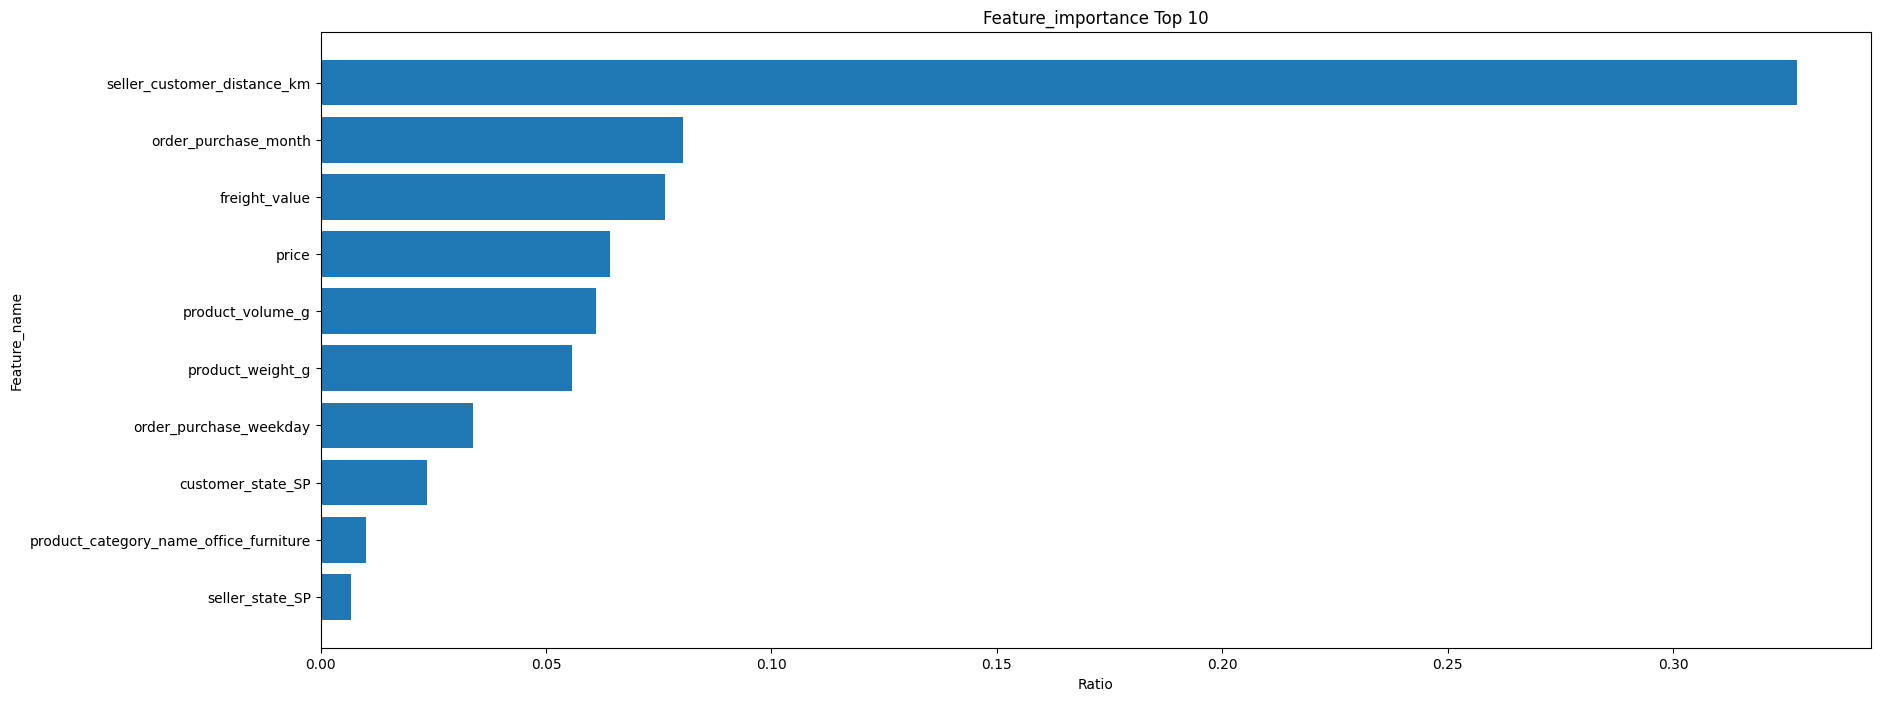

In [70]:
import matplotlib.pyplot as plt

top_n = 10
top_feature_indices = sorted_indices[:top_n]
top_feature_names = [feature_name[i] for i in top_feature_indices]
top_feature_importances = [feature_importances[i] for i in top_feature_indices]

plt.figure(figsize=(20, 8))
plt.barh(top_feature_names[::-1], top_feature_importances[::-1])
plt.title("Feature_importance Top 10")
plt.ylabel("Feature_name")
plt.xlabel("Ratio")
plt.show()

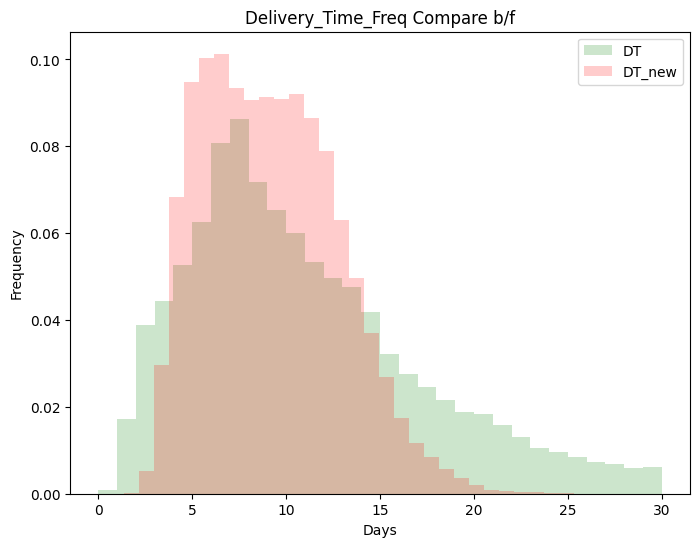

In [71]:
plt.figure(figsize=(8, 6))
plt.hist(df_delivery["delivery_time_day"], color = "green", alpha=0.2, bins = 30, label="DT", density=True)
plt.hist(df_delivery["delivery_time_day_new"], color = "red", alpha=0.2, bins = 30, label="DT_new", density=True)
plt.legend()
plt.title("Delivery_Time_Freq Compare b/f")
plt.ylabel("Frequency")
plt.xlabel("Days")
plt.show()

#### 부록

In [ ]:
# from sklearn.model_selection import GridSearchCV

# start_time = datetime.now()
# print("start Time : ", start_time)

# X = df_delivered2_ml_x.drop(columns="freight_value")
# y = df_delivered2_ml_x["freight_value"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = RandomForestRegressor()

# param_grid = {
#     "n_estimators" : [50, 100, 200],
#     "max_depth" : [None, 10, 20],
#     "min_samples_split" : [2, 5, 10],
#     "min_samples_leaf" : [1, 2, 4]
# }

# grid_search = GridSearchCV(model, param_grid, cv=5, scoring={'mae': 'neg_mean_absolute_error', 'mse': 'neg_mean_squared_error'}, refit='mae', return_train_score=True)

# grid_search.fit(X_train, y_train)
# print("Best Hyperparameters:", grid_search.best_params_)

# end_time = datetime.now()
# print("complete time : ", end_time)
# print('-'*30)
# print("loading : ", end_time - start_time)

# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_test)

# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)

# print(f"mae : {mae}, mse : {mse}")